In [ ]:
!pip install pandas

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras import layers, callbacks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
salud_data = pd.read_csv('/content/Consultas_de_Medicina_General_20241021.csv')
salud_data

,Nom_Categoria,Fecha_Factura,Cups,Nom_Procedimiento,Regimen,IPS,Cantidad
0,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
1,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
3,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
4,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
...,...,...,...,...,...,...,...
245335,05- Consultas de medicina general electivas re...,06/30/2022 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Vinculado,29-HOSPITAL SANTA MONICA,1
245336,05- Consultas de medicina general electivas re...,06/30/2022 12:00:00 AM,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,Vinculado,29-HOSPITAL SANTA MONICA,1
245337,05- Consultas de medicina general electivas re...,06/30/2022 12:00:00 AM,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL RIAS,Subsidiado,29-HOSPITAL SANTA MONICA,1
245338,05- Consultas de medicina general electivas re...,06/30/2022 12:00:00 AM,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL RIAS,Subsidiado,29-HOSPITAL SANTA MONICA,1


In [ ]:
# Eliminar valores nulos
salud_data = salud_data.dropna()

In [ ]:
salud_data.columns

Index(['Nom_Categoria', 'Fecha_Factura', 'Cups', 'Nom_Procedimiento',
       'Regimen', 'IPS', 'Cantidad'],
      dtype='object')

In [ ]:
salud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245340 entries, 0 to 245339
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Nom_Categoria      245340 non-null  object
 1   Fecha_Factura      245340 non-null  object
 2   Cups               245340 non-null  object
 3   Nom_Procedimiento  245340 non-null  object
 4   Regimen            245340 non-null  object
 5   IPS                245340 non-null  object
 6   Cantidad           245340 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 13.1+ MB


In [ ]:
# Convert 'Fecha_Factura' to datetime if it's not already

salud_data['Fecha_Factura'] = pd.to_datetime(salud_data['Fecha_Factura'])

salud_data['Fecha_Factura'].dt.strftime('%d/%m/%Y')
# Verificamos que solo queda la columna original
salud_data

<ipython-input-8-deafd3a0ed60>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  salud_data['Fecha_Factura'] = pd.to_datetime(salud_data['Fecha_Factura'])


,Nom_Categoria,Fecha_Factura,Cups,Nom_Procedimiento,Regimen,IPS,Cantidad
0,05 - Consultas de medicina general elec...,2021-10-01,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
1,05 - Consultas de medicina general elec...,2021-10-01,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2,05 - Consultas de medicina general elec...,2021-10-01,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
3,05 - Consultas de medicina general elec...,2021-10-01,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
4,05 - Consultas de medicina general elec...,2021-10-01,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
...,...,...,...,...,...,...,...
245335,05- Consultas de medicina general electivas re...,2022-06-30,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Vinculado,29-HOSPITAL SANTA MONICA,1
245336,05- Consultas de medicina general electivas re...,2022-06-30,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,Vinculado,29-HOSPITAL SANTA MONICA,1
245337,05- Consultas de medicina general electivas re...,2022-06-30,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL RIAS,Subsidiado,29-HOSPITAL SANTA MONICA,1
245338,05- Consultas de medicina general electivas re...,2022-06-30,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL RIAS,Subsidiado,29-HOSPITAL SANTA MONICA,1


In [ ]:
df=salud_data.copy()
df.index = df['Fecha_Factura']
df.drop(columns=['Fecha_Factura'], inplace=True)
df

,Nom_Categoria,Cups,Nom_Procedimiento,Regimen,IPS,Cantidad
Fecha_Factura,,,,,,
2021-10-01,05 - Consultas de medicina general elec...,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2021-10-01,05 - Consultas de medicina general elec...,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2021-10-01,05 - Consultas de medicina general elec...,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2021-10-01,05 - Consultas de medicina general elec...,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2021-10-01,05 - Consultas de medicina general elec...,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
...,...,...,...,...,...,...
2022-06-30,05- Consultas de medicina general electivas re...,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Vinculado,29-HOSPITAL SANTA MONICA,1
2022-06-30,05- Consultas de medicina general electivas re...,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,Vinculado,29-HOSPITAL SANTA MONICA,1
2022-06-30,05- Consultas de medicina general electivas re...,890201,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL RIAS,Subsidiado,29-HOSPITAL SANTA MONICA,1


In [ ]:
df.reset_index(inplace=True)

In [ ]:
#Agrupa los datos por dia
result_df = df.groupby(['Fecha_Factura', 'Nom_Procedimiento'])['Cantidad'].sum().reset_index(name='TotalCantidad')
filtered_df = result_df[result_df['Nom_Procedimiento'] == 'CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL']
filtered_df

,Fecha_Factura,Nom_Procedimiento,TotalCantidad
5,2021-10-01,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,141
16,2021-10-02,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,74
26,2021-10-03,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,5
34,2021-10-04,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,101
47,2021-10-05,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,127
...,...,...,...
2662,2022-06-26,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,4
2667,2022-06-27,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,1
2675,2022-06-28,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,167
2687,2022-06-29,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,176


___

In [ ]:
#define weekday
#filtered_df = filtered_df[filtered_df['TotalCantidad'] > 0]
#filtered_df.head(10)


filtered_uno = filtered_df.loc[filtered_df['TotalCantidad'] > 0]

___

In [ ]:
filtered_uno.index = filtered_uno['Fecha_Factura']
filtered_uno.drop(columns=['Fecha_Factura'], inplace=True)


train = filtered_uno[(filtered_uno.index.year < 2022) | ((filtered_uno.index.year == 2022) & (filtered_uno.index.month <= 6))]
test = filtered_uno[(filtered_uno.index.year >= 2022) & (filtered_uno.index.month >= 6)]


#test = filtered_df[filtered_df.index.year==2022]    #Prueba
#test.reset_index()
train

,Nom_Procedimiento,TotalCantidad
Fecha_Factura,,
2021-10-01,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,141
2021-10-02,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,74
2021-10-03,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,5
2021-10-04,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,101
2021-10-05,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,127
...,...,...
2022-06-26,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,4
2022-06-27,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,1
2022-06-28,CONSULTA DE PRIMERA VEZ POR MEDICINA GENERAL,167


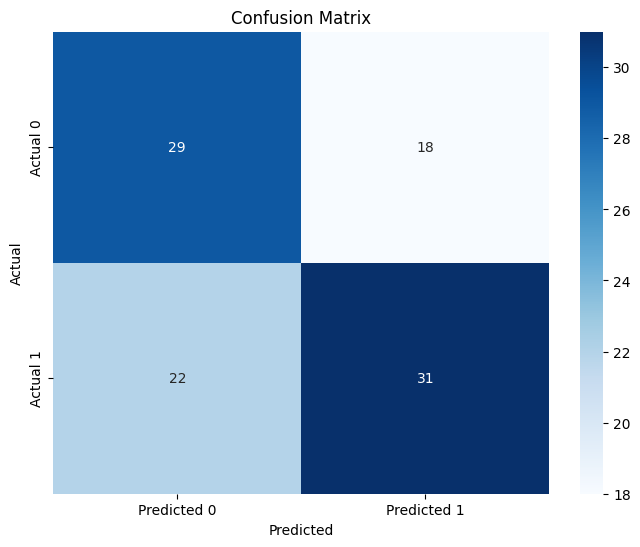

In [ ]:
# prompt: creame una matriz de confusion para estos datos

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have 'y_true' (true labels) and 'y_pred' (predicted labels)
# Replace these with your actual true and predicted values.
# For example:
# y_true = test['TotalCantidad']  # Assuming 'TotalCantidad' is your target variable
# y_pred = model.predict(X_test) # Assuming you have a trained model and X_test

# Example: Create dummy data for demonstration
y_true = np.random.randint(0, 2, 100)  # Replace with your true labels
y_pred = np.random.randint(0, 2, 100)  # Replace with your predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

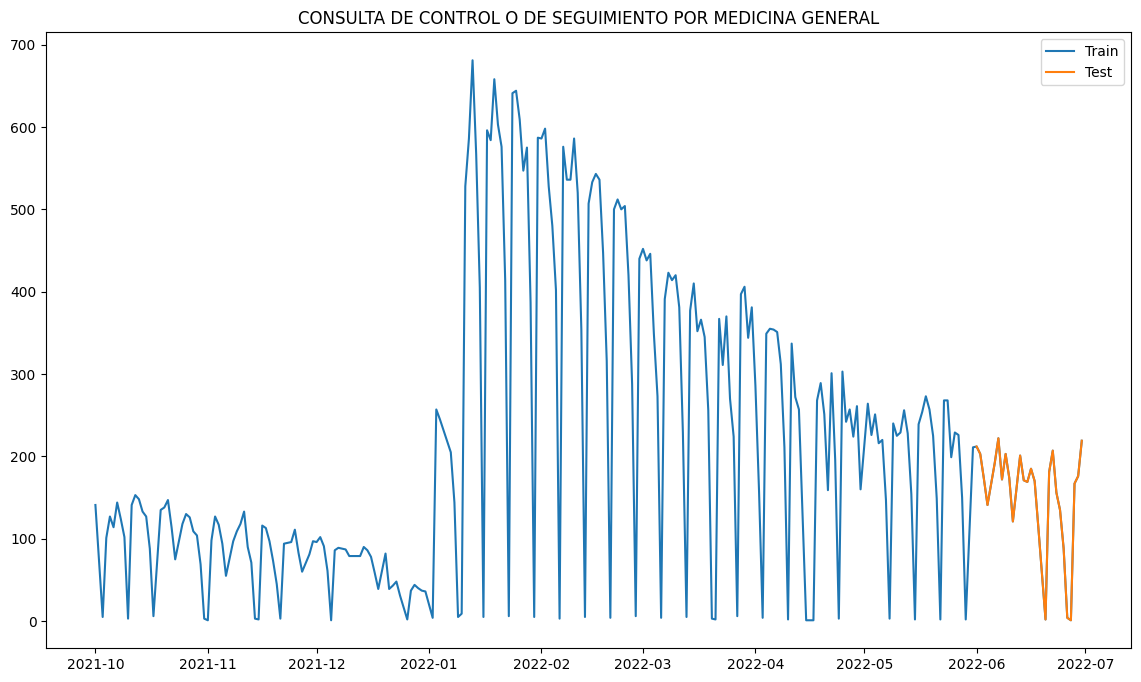

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(train['TotalCantidad'], label='Train')
plt.plot(test['TotalCantidad'], label='Test')
plt.legend()
plt.title('CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDICINA GENERAL')
plt.show()

## SCALING

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train['TotalCantidad'].values.reshape(-1, 1))
training_set_scaled.shape

(254, 1)

In [ ]:
X_train = []
y_train = []
for i in range(10,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-10:i,0])

    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print(y_train)

[[0.20588235 0.10735294 0.00588235 ... 0.18088235 0.14852941 0.00294118]
 [0.10735294 0.00588235 0.14705882 ... 0.14852941 0.00294118 0.20588235]
 [0.00588235 0.14705882 0.18529412 ... 0.00294118 0.20588235 0.22352941]
 ...
 [0.24852941 0.16764706 0.00147059 ... 0.12794118 0.00441176 0.        ]
 [0.16764706 0.00147059 0.26470588 ... 0.00441176 0.         0.24411765]
 [0.00147059 0.26470588 0.30294118 ... 0.         0.24411765 0.25735294]]
[0.20588235 0.22352941 0.21617647 0.19411765 0.18529412 0.12794118
 0.00735294 0.19705882 0.20147059 0.21470588 0.16617647 0.10882353
 0.17205882 0.18970588 0.18382353 0.15882353 0.15147059 0.1
 0.00294118 0.         0.14264706 0.18529412 0.17058824 0.13676471
 0.07941176 0.14117647 0.15882353 0.17205882 0.19411765 0.13088235
 0.10294118 0.00294118 0.00147059 0.16911765 0.16470588 0.14117647
 0.10588235 0.06470588 0.00294118 0.13676471 0.13823529 0.13970588
 0.16176471 0.12058824 0.08676471 0.11764706 0.14117647 0.13970588
 0.14852941 0.13235294 0.08

In [ ]:
X_train.shape

(244, 10)

## Reshape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.20588235],
        [0.10735294],
        [0.00588235],
        ...,
        [0.18088235],
        [0.14852941],
        [0.00294118]],

       [[0.10735294],
        [0.00588235],
        [0.14705882],
        ...,
        [0.14852941],
        [0.00294118],
        [0.20588235]],

       [[0.00588235],
        [0.14705882],
        [0.18529412],
        ...,
        [0.00294118],
        [0.20588235],
        [0.22352941]],

       ...,

       [[0.24852941],
        [0.16764706],
        [0.00147059],
        ...,
        [0.12794118],
        [0.00441176],
        [0.        ]],

       [[0.16764706],
        [0.00147059],
        [0.26470588],
        ...,
        [0.00441176],
        [0.        ],
        [0.24411765]],

       [[0.00147059],
        [0.26470588],
        [0.30294118],
        ...,
        [0.        ],
        [0.24411765],
        [0.25735294]]])

## LSTM MODEL

In [ ]:
model = Sequential([
    #units= conecctiosn
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)),
    layers.Dropout(0.2),
  #capa
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),
  #capa
    layers.LSTM(units=50, return_sequences=True),
    layers.Dropout(0.2),
  #capa
    layers.LSTM(units=50),
    layers.Dropout(0.2),
  #capa
    layers.Dense(units=1),
])
#evaluattion model
model.compile(optimizer='adam',loss='mse', metrics=['mse', 'mae', 'mape'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

## FITTING THE MODEL

In [ ]:
import tensorflow as tf # imports the tensorflow module and assigns it to the variable tf

with tf.device('/GPU:0'):

    early_stopping = callbacks.EarlyStopping(
        patience=6,
        min_delta=0.001,
        restore_best_weights=True,
    )

    history = model.fit(X_train,y_train,epochs=100,batch_size=24, callbacks=[early_stopping])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.1369 - mae: 0.2855 - mape: 2187255.7500 - mse: 0.1369
Epoch 2/100
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0755 - mae: 0.2222 - mape: 5154149.5000 - mse: 0.0755

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae,mape,mse
  current = self.get_monitor_value(logs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0667 - mae: 0.2058 - mape: 5664114.0000 - mse: 0.0667
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0607 - mae: 0.1835 - mape: 4993114.0000 - mse: 0.0607
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0430 - mae: 0.1516 - mape: 4749689.0000 - mse: 0.0430
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0433 - mae: 0.1442 - mape: 6282098.0000 - mse: 0.0433
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0528 - mae: 0.1572 - mape: 3019449.0000 - mse: 0.0528
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0415 - mae: 0.1381 - mape: 7814517.0000 - mse: 0.0415
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0380 - mae: 0.1383 - mape: 5599789.5000 - mse: 0.0380
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0410 - mae: 0.1328 - mape: 7947279.5000 - mse: 0.0410
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0383 - mae: 0.1349 - 

# Validation

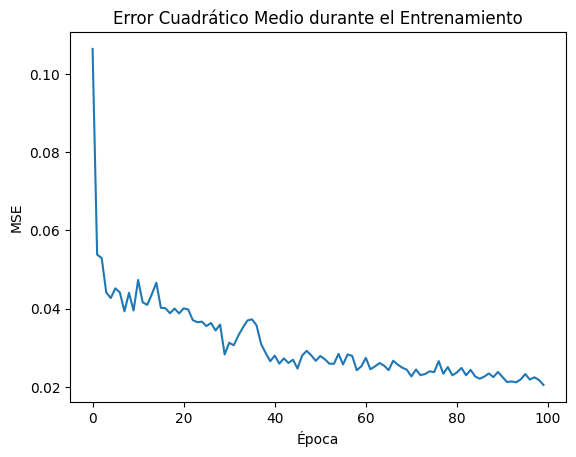

In [ ]:
plt.plot(history.history['mse'])  # Graficar el MSE
plt.title('Error Cuadrático Medio durante el Entrenamiento')
plt.ylabel('MSE')
plt.xlabel('Época')
plt.show()

In [ ]:
history_frame = pd.DataFrame(history.history)

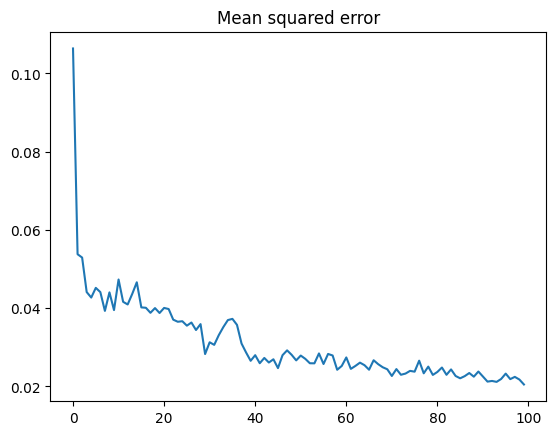

In [ ]:
plt.plot(history_frame.loc[:, ['mse']])
plt.title('Mean squared error')
plt.show()

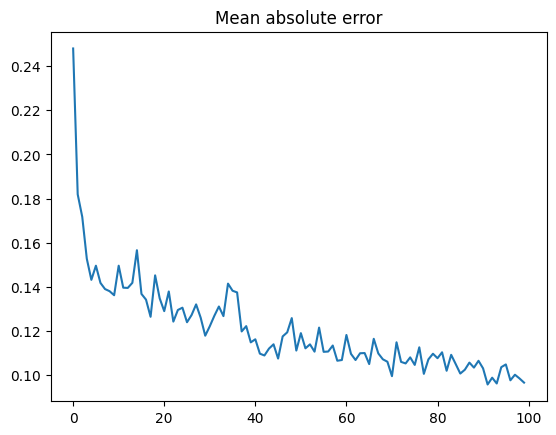

In [ ]:
plt.plot(history_frame.loc[:, ['mae']])
plt.title('Mean absolute error')
plt.show()

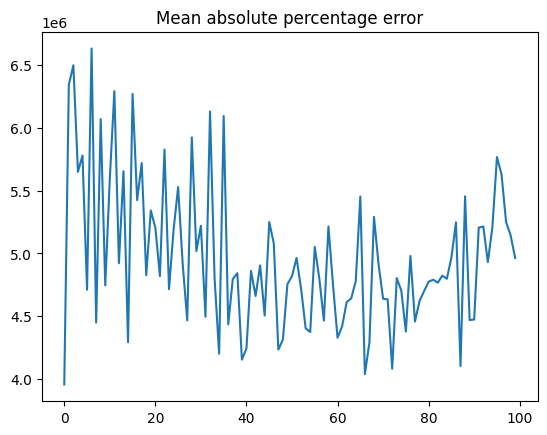

In [ ]:
plt.plot(history_frame.loc[:, ['mape']])
plt.title('Mean absolute percentage error')
plt.show()

## Predictions

In [ ]:
dataset_total = filtered_uno['TotalCantidad']
print(dataset_total)
inputs = dataset_total[len(dataset_total)-len(test['TotalCantidad'].values) - 80:].values
print(inputs)
inputs = inputs.reshape(-1,1)
print(inputs)
inputs  = sc.transform(inputs)
print(inputs)

Fecha_Factura
2021-10-01    141
2021-10-02     74
2021-10-03      5
2021-10-04    101
2021-10-05    127
             ... 
2022-06-26      4
2022-06-27      1
2022-06-28    167
2022-06-29    176
2022-06-30    219
Name: TotalCantidad, Length: 254, dtype: int64
[414 420 381 229   5 377 410 352 366 345 256   3   2 367 311 370 270 224
   6 397 406 344 381 286 158   4 349 355 354 351 312 211   2 337 272 257
   1   1 268 289 251 159 301 196   3 303 242 257 224 261 160 264 226 251
 216 220 147   3 240 225 229 256 228 154   2 239 254 273 257 225 149   2
 268 268 199 229 226 150   2 211 212 203 173 141 192 222 172 203 174 121
 201 171 169 185 170 115   2 181 207 156 135  88   4   1 167 176 219]
[[414]
 [420]
 [381]
 [229]
 [  5]
 [377]
 [410]
 [352]
 [366]
 [345]
 [256]
 [  3]
 [  2]
 [367]
 [311]
 [370]
 [270]
 [224]
 [  6]
 [397]
 [406]
 [344]
 [381]
 [286]
 [158]
 [  4]
 [349]
 [355]
 [354]
 [351]
 [312]
 [211]
 [  2]
 [337]
 [272]
 [257]
 [  1]
 [  1]
 [268]
 [289]
 [251]
 [159]
 [301]
 [196

In [ ]:
#Redes neuronal

X_test = []
for i in range(80,len(inputs)):
    X_test.append(inputs[i-80:i,0])
X_test = np.array(X_test)
print(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[0.60735294 0.61617647 0.55882353 ... 0.21911765 0.00147059 0.30882353]
 [0.61617647 0.55882353 0.33529412 ... 0.00147059 0.30882353 0.31029412]
 [0.55882353 0.33529412 0.00588235 ... 0.30882353 0.31029412 0.29705882]
 ...
 [0.23088235 0.00441176 0.51176471 ... 0.12794118 0.00441176 0.        ]
 [0.00441176 0.51176471 0.52058824 ... 0.00441176 0.         0.24411765]
 [0.51176471 0.52058824 0.51911765 ... 0.         0.24411765 0.25735294]]
[[[0.60735294]
  [0.61617647]
  [0.55882353]
  ...
  [0.21911765]
  [0.00147059]
  [0.30882353]]

 [[0.61617647]
  [0.55882353]
  [0.33529412]
  ...
  [0.00147059]
  [0.30882353]
  [0.31029412]]

 [[0.55882353]
  [0.33529412]
  [0.00588235]
  ...
  [0.30882353]
  [0.31029412]
  [0.29705882]]

 ...

 [[0.23088235]
  [0.00441176]
  [0.51176471]
  ...
  [0.12794118]
  [0.00441176]
  [0.        ]]

 [[0.00441176]
  [0.51176471]
  [0.52058824]
  ...
  [0.00441176]
  [0.        ]
  [0.24411765]]

 [[0.51176471]
  [0.52058824]
  [0.51911765]
  ...
  [0.    

In [ ]:
predictions = pd.DataFrame()
predictions['Actuals'] = test['TotalCantidad']
predictions['Predictions'] = predicted_stock_price

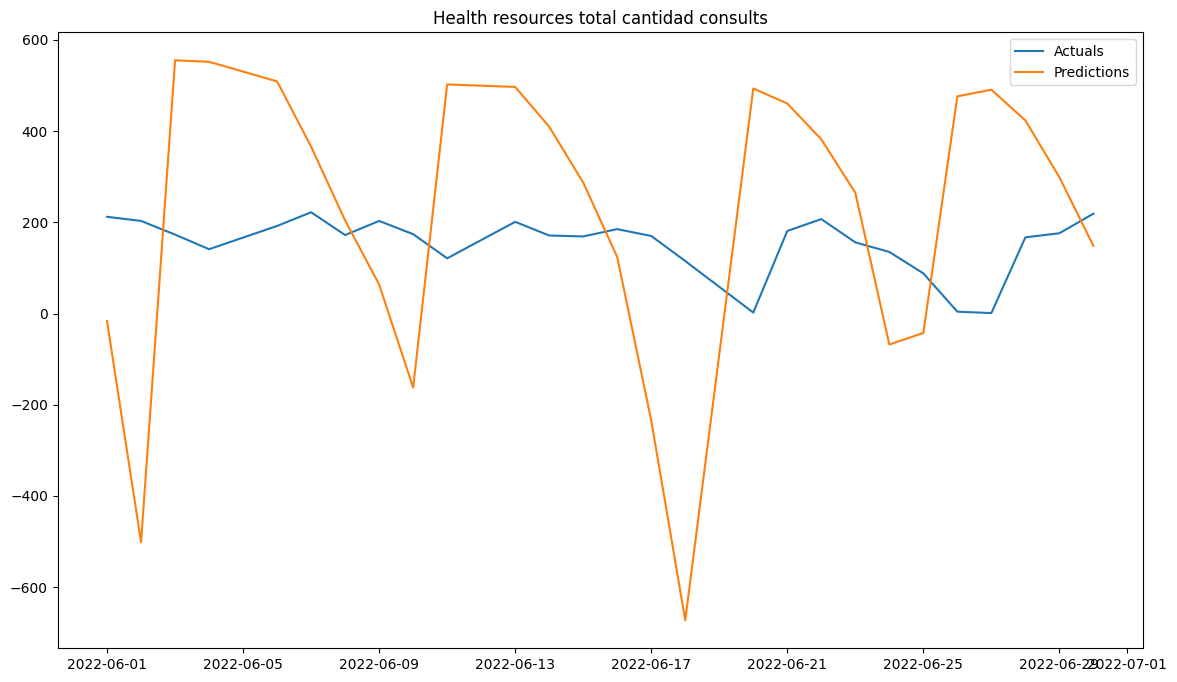

In [ ]:
plt.figure(figsize=(14,8))
plt.title('Health resources total cantidad consults')
plt.plot(predictions['Actuals'], label='Actuals')
plt.plot(predictions['Predictions'], label='Predictions')
plt.legend()
plt.show()

## Problemas identificados y posibles soluciones:

**Preprocesamiento inadecuado para RNN:** Estás usando MinMaxScaler en todo el dataset antes de dividirlo en entrenamiento y prueba. Esto introduce data leakage, donde información del conjunto de prueba se filtra al conjunto de entrenamiento. Debes escalar solo los datos de entrenamiento y luego aplicar la misma transformación a los datos de prueba.

**Secuencias no definidas:** El código actual no define claramente las secuencias. Estás convirtiendo los datos en un array 3D, pero no se entiende qué representa cada dimensión. Para una RNN, necesitas secuencias de datos. Dado que no hay un ID de paciente, podrías crear secuencias temporales (ej. número de consultas por día, semana o mes).

**Manejo de variables categóricas:** Estás incluyendo variables categóricas directamente en el modelo, lo cual no es correcto para un LSTM. Debes usar one-hot encoding o embeddings para representarlas. Considera eliminar variables irrelevantes como cups que parecen ser códigos y no aportan información temporal.

**Definición de la variable objetivo:** No queda claro cómo estás definiendo la variable objetivo. Si quieres predecir la cantidad de consultas de control, debes crear una nueva columna que represente esta cantidad para cada secuencia temporal.

**Arquitectura del modelo:** La arquitectura del LSTM es muy simple. Podrías experimentar con más capas, diferentes tipos de celdas (GRU), o incluso una arquitectura bidireccional.

**Evaluación del modelo:** La gráfica muestra las predicciones, pero no hay métricas de error (RMSE, MAE). Estas son cruciales para evaluar el rendimiento del modelo.

## Recomendaciones concretas:

**Define la secuencia temporal:** Decide si quieres predecir las consultas diarias, semanales o mensuales. Agrega una columna de fecha y agrupa los datos por esa fecha y nom_procedimiento para obtener la cantidad de consultas.

**Preprocesa las variables categóricas:** Usa one-hot encoding para regimen y descarta variables como cups, nom_categoria e IPS que no parecen aportar información relevante para la predicción. Podrías analizar si la información de IPS es útil agregándola y codificándola.

**Divide los datos en entrenamiento y prueba:** Haz esto antes de escalar los datos.

**Escala los datos:** Usa MinMaxScaler o StandardScaler solo en los datos de entrenamiento. Aplica la misma transformación a los datos de prueba.

**Crea las secuencias para la RNN:** Usa TimeseriesGenerator de Keras o crea tus propias secuencias. Define la longitud de la secuencia y el horizonte de predicción (cuántos pasos en el futuro quieres predecir).

**Ajusta la arquitectura del modelo:** Experimenta con diferentes arquitecturas LSTM.

**Evalúa el modelo:** Calcula métricas de error como RMSE y MAE.

## Model 2

In [6]:
salud_data_vtres = salud_data.copy()
salud_data_vtres.head()

,Nom_Categoria,Fecha_Factura,Cups,Nom_Procedimiento,Regimen,IPS,Cantidad
0,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
1,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
2,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
3,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1
4,05 - Consultas de medicina general elec...,10/01/2021 12:00:00 AM,890301,CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDIC...,Subsidiado,01-CS PRIMERO DE MAYO,1


In [34]:
#!pip install ydata-profiling
# Install the ydata-profiling library

import pandas as pd
from ydata_profiling import ProfileReport
# Import necessary libraries

# Generate the profile report
profile = ProfileReport(salud_data, title="Pandas Profiling Report")
profile.to_file("salud_data_report.html")
# Create a profile report for your DataFrame 'salud_data' and save to an html


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

TypeError: 'Root' object is not callable

In [37]:
y_pred = rf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'html'

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
# ... cargar y filtrar datos para un tipo de consulta ...
df_control = salud_data_vtres[salud_data_vtres['Nom_Procedimiento'] == 'CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDICINA GENERAL']
df_diario = df_control.groupby('Fecha_Factura')['Nom_Procedimiento'].count().reset_index()
df_diario.columns = ['Fecha', 'Cantidad']


# Dividir en train/test
train_data, test_data = train_test_split(df_diario, test_size=0.2, shuffle=False)

# Escalar datos (solo entrenamiento)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Cantidad']])
test_scaled = scaler.transform(test_data[['Cantidad']])

In [16]:
# Instead of 'df', use 'salud_data_vtres' which is likely the original DataFrame
df_control = salud_data_vtres[salud_data_vtres['Nom_Procedimiento'] == 'CONSULTA DE CONTROL O DE SEGUIMIENTO POR MEDICINA GENERAL']
df_diario = df_control.groupby('Fecha_Factura')['Nom_Procedimiento'].count().reset_index()
df_diario.columns = ['Fecha', 'Cantidad']

# Dividir en train/test
train_data, test_data = train_test_split(df_diario, test_size=0.2, shuffle=False)

# Escalar datos (solo entrenamiento)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['Cantidad']])
test_scaled = scaler.transform(test_data[['Cantidad']])

In [17]:

#####
# Crear secuencias
n_input = 10
n_features = 1
train_generator = TimeseriesGenerator(train_scaled, train_scaled[:,0], length=n_input, batch_size=32) # Cambio aquí
test_generator = TimeseriesGenerator(test_scaled, test_scaled[:,0], length=n_input, batch_size=32)  # Cambio aquí


# Modelo LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(train_generator, epochs=250)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2587

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2571
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2352
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2123
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0561
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0741
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0540
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0514
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0440
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0520
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0549
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0528
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0516
Epoch 13/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0517
Epoch 14/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0594
Epoch 15/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0469
Epoch 16/250
7/7 ━━━━━━━━━━━━━━

In [18]:
# Predicciones
predictions_scaled = model.predict(test_generator)

# Before inverse transform, reshape to 2D
predictions_scaled_2d = predictions_scaled.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions_scaled_2d)

# Reshape back to original dimensions to compare with true values
predictions = predictions.reshape(predictions_scaled.shape[0], predictions_scaled.shape[1])

# Get the last value from each predicted sequence (assuming you want to predict the next value)
predictions = predictions[:, -1]

# RMSE
true_values = test_data['Cantidad'][n_input:].values
rmse = np.sqrt(np.mean((predictions - true_values)**2))
print(f"RMSE: {rmse}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
RMSE: 209.9286939382612


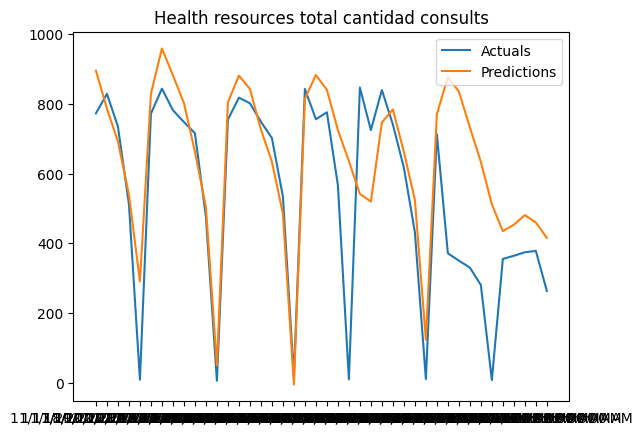

In [19]:
# Visualizar resultados
import matplotlib.pyplot as plt
plt.plot(test_data['Fecha'][n_input:], true_values, label='Actuals')
plt.plot(test_data['Fecha'][n_input:], predictions.flatten(), label='Predictions')
plt.legend()
plt.title('Health resources total cantidad consults')
plt.show()

In [41]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = df_diario.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'predict'

In [ ]:
# Instead of using df_diario, use your trained model 'model'
y_pred = model.predict(test_generator) # Assuming 'test_generator' is your test data for the model

# Reshape the predictions to match the shape of the true values (if needed)
y_pred = y_pred.reshape(-1)

# You might need to adjust how you obtain true values
true_values = test_data['Cantidad'][n_input:].values # Change this based on how you get true values

# Calculate the confusion matrix on the continuous values.
# Convert to binary using a threshold to have it as a classification task if using a confusion matrix
threshold = 0.5  # Or another threshold suitable for your task

y_pred_binary = (y_pred > threshold).astype(int)
true_values_binary = (true_values > threshold).astype(int)

# Compute and plot the confusion matrix
cm = confusion_matrix(true_values_binary, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


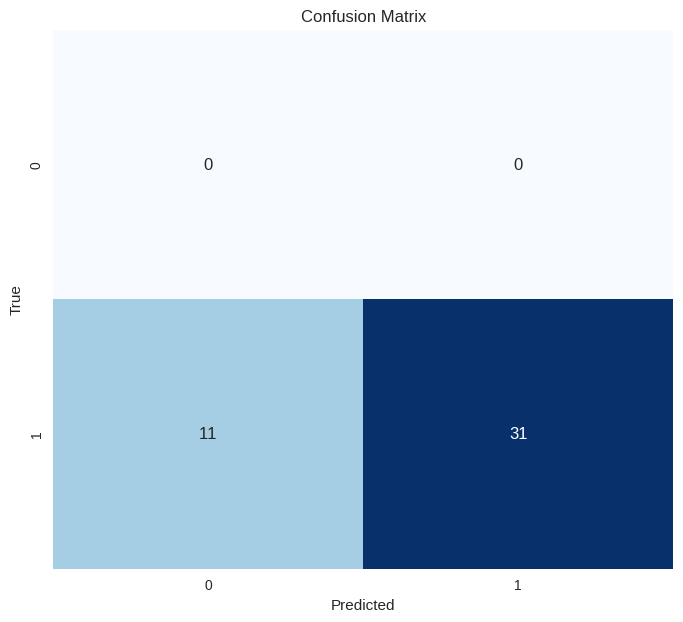

In [43]:
# Instead of using df_diario, use your trained model 'model'
y_pred = model.predict(test_generator) # Assuming 'test_generator' is your test data for the model

# Reshape the predictions to match the shape of the true values (if needed)
y_pred = y_pred.reshape(-1)

# You might need to adjust how you obtain true values
true_values = test_data['Cantidad'][n_input:].values # Change this based on how you get true values

# Calculate the confusion matrix on the continuous values.
# Convert to binary using a threshold to have it as a classification task if using a confusion matrix
threshold = 0.5  # Or another threshold suitable for your task

y_pred_binary = (y_pred > threshold).astype(int)
true_values_binary = (true_values > threshold).astype(int)

# Compute and plot the confusion matrix
cm = confusion_matrix(true_values_binary, y_pred_binary)

plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
from sklearn.linear_model import LogisticRegression  # Or any other suitable model
# ... other imports ...

# Create and train the model (replace with your actual model and training data)
reg = LogisticRegression()
reg.fit(x_train, y_train) # Assumes you have x_train and y_train defined

# Now you can use 'reg' for prediction
y_pred = reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = [0, 1])

#Vizualizing the display requires that we import pyplot from matplotlib.

import matplotlib.pyplot as plt

#Finally to display the plot we can use the functions plot() and show() from pyplot.

cm_display.plot()
plt.show()


NameError: name 'x_train' is not defined